In [54]:
library(tidyverse);
library(readxl)
library(questionr) # pour la fonction describe()
#library(summarytools) # pour la fonction univari()
#library(gtsummary)

## 1.2	Importation et mise en forme 

 *   Importer la base de données dans un objet de type data.frame nommé projet

In [2]:
projet <- read_excel("../data/Base_Projet.xlsx")

In [3]:
head(projet,2) # Petite aperçu de la base de donnée 

key,q1,q2,q23,q24,q24a_1,q24a_2,q24a_3,q24a_4,q24a_5,⋯,filiere_2,filiere_3,filiere_4,q8,q81,gps_menlatitude,gps_menlongitude,submissiondate,start,today
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>
uuid:68bff42b-1228-4c66-9bcc-e6d312d9fea6,Diourbel,Bambey,Femme,65,0,1,0,1,0,⋯,0,0,0,Aucun,Propriétaire,14.62691,-16.46786,2021-06-14 20:04:38,2021-06-14 15:38:19,2021-06-14
uuid:d70b3c7e-3ca0-4358-bc59-3f7f6baf55e9,Thiès,Mbour,Femme,52,1,1,0,0,1,⋯,0,1,0,Tansformation d'autres céréales,Propriétaire,14.39973,-16.95614,2021-06-07 21:58:11,2021-06-03 19:55:41,2021-06-03


* Donner le nombre de lignes (i.e. le nombre de PME) et colonnes (i.e. nombre de variables) de la base
projet


In [4]:
paste0("Nombre de ligne  de la base : ",nrow(projet))

[1] "Nombre de ligne  de la base : 250"

In [5]:
paste0("Nombre de colonne de la base : ",ncol(projet))

[1] "Nombre de colonne de la base : 33"

* Vérifier s’il y a des valeurs manquantes pour la variable key dans la base projet. Si oui, identifier la (ou les) PME concernée(s).

In [6]:
any(is.na(projet$key)) # y a t-il au moins une valeur manquante ?

[1] FALSE

In [7]:
# Pas de valeur manquantes dans la variable key

## 1.3	Création de variables (2.5 pts)

* Rénommer la variable q1 en region
* Rénommer la variable q2 en departement
* Rénommer la variable q23 en sexe


In [8]:
projet<-projet%>%
    rename(region=q1,departement=q2,sexe=q23)

In [9]:
head(projet,1)

key,region,departement,sexe,q24,q24a_1,q24a_2,q24a_3,q24a_4,q24a_5,⋯,filiere_2,filiere_3,filiere_4,q8,q81,gps_menlatitude,gps_menlongitude,submissiondate,start,today
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>
uuid:68bff42b-1228-4c66-9bcc-e6d312d9fea6,Diourbel,Bambey,Femme,65,0,1,0,1,0,⋯,0,0,0,Aucun,Propriétaire,14.62691,-16.46786,2021-06-14 20:04:38,2021-06-14 15:38:19,2021-06-14


 * Créer la variable sexe_2 qui vaut 1 si sexe égale à Femme et 0 sinon

In [10]:
class(projet$sexe)  # Un string, donc la casse interviens

[1] "character"

In [11]:
projet<-projet%>%
    mutate(sexe_2=as.integer(tolower(sexe)=="femme"))
# tolower pour normaliser la casse
# on se sert de l'egalite TRUE==1 pour la conversion en integer

In [12]:
describe(projet$sexe_2)

[250 obs.] 
integer: 1 1 1 1 0 1 1 0 1 0 ...
min: 0 - max: 1 - NAs: 0 (0%) - 2 unique values

        n     %
0      59  23.6
1     191  76.4
Total 250 100.0

* Créer un data.frame nommé langues qui prend les variables key et les variables correspondantes décrites plus haut.

In [13]:
# Regardons la maniere dont est ordonne nos variables
names(projet)

[1] "key"              "region"           "departement"      "sexe"            
 [5] "q24"              "q24a_1"           "q24a_2"           "q24a_3"          
 [9] "q24a_4"           "q24a_5"           "q24a_6"           "q24a_7"          
[13] "q24a_9"           "q24a_10"          "q25"              "q26"             
[17] "q12"              "q14b"             "q16"              "q17"             
[21] "q19"              "q20"              "filiere_1"        "filiere_2"       
[25] "filiere_3"        "filiere_4"        "q8"               "q81"             
[29] "gps_menlatitude"  "gps_menlongitude" "submissiondate"   "start"           
[33] "today"            "sexe_2"

In [14]:
# On peut se servir de l'ordre avec q24a_1:q24a_10
# ou alors on peut aussi se servir du fait que ce sont les seuls a commencer par q24a_ 

In [15]:
langues<- projet%>%
    select(key,starts_with("q24a_"))%>%
    as.data.frame()
    # les fonctions de dplyr genere des objet de type tibble convertible en data.frane

In [16]:
head(langues,1)

,key,q24a_1,q24a_2,q24a_3,q24a_4,q24a_5,q24a_6,q24a_7,q24a_9,q24a_10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,uuid:68bff42b-1228-4c66-9bcc-e6d312d9fea6,0,1,0,1,0,0,0,0,0


* Créer une variable parle qui est égale au nombre de langue parlée par le dirigeant de la PME.

In [17]:
langue_parle_PME<-langues%>%
    select(-key)# on selectionne uniquement les variables ayant trait a la langue 

In [18]:
langues <-langues%>%
    mutate(parle=rowSums(langue_parle_PME) )# a chaque individus on somme les lignes de la variable langue_parle_PME

In [19]:
head(langues$parle)

[1] 2 3 2 3 4 3

* Sélectionnez uniquement les variables key et parle, l’objet de retour sera langues

In [20]:
langues <-langues%>% 
    select(key,parle)

In [21]:
head(langues,1)

,key,parle
,<chr>,<dbl>
1,uuid:68bff42b-1228-4c66-9bcc-e6d312d9fea6,2


* Merger les data.frame projet et langues:

In [22]:
# Les deux data.frames ont la colonne key en commun, on vas maj projet
projet<- merge(projet,langues,by="key")

In [23]:
head(projet[,c("key","parle")],2) # Le merge a fonctionne avec succes

,key,parle
,<chr>,<dbl>
1,uuid:004b9117-d180-4031-a6af-6b4efabb5f53,1
2,uuid:007d8eb4-45eb-44f4-aeac-722adc60aec8,2


## 2 Analyses descriptives (10 pts)

 * Quelle est la répartion des PME suivant:
    * le sexe?
    * le niveau d’instruction?
    * le statut juridique?
    * le propriétaire/locataire?
    * le statut juridique et le sexe?
    * le niveau d’instruction et le sexe?
    * Propriétaire/locataire suivant le sexe?


In [24]:
#-------- Repartition des PME suivant le sexe

In [25]:
#  Repartition des PME suivant le sexe
# ---------- ligne des effectifs
tab_effectif <- table(projet$sexe) # Calcul des effectifs
tab_effectif <- rbind(tab_effectif ) # Permet de generer un tableau avec des lignes nommee 
rownames(tab_effectif)[1] <- "Effectifs" # modificiation du nom de la ligne
# ---------- ligne des pourcentages
tab_effectif_percent <- prop.table(tab_effectif) * 100 # calcul des pourcentages
rownames(tab_effectif_percent)<-"Pourcentage" # pas bessoin de rbin on travail deja un tab a ligne nommme (tab_effectif)
# ---------- ligne des valeurs manquantes
tab_sexe <- rbind(tab_effectif, "Valeurs manquantes" = sum(is.na(projet$sexe)))# ajout de la ligne NA
# ---------- tableau repartition des PME suivant le sexe
tab_sexe<-rbind(tab_sexe,tab_effectif_percent)
tab_sexe

,Femme,Homme
Effectifs,191.0,59.0
Valeurs manquantes,0.0,0.0
Pourcentage,76.4,23.6


In [26]:
# intervertissons les lignes "Valeurs manquantes" et "Pourcentages" 
# -------- tab_sexe est une matrice donc pas de slice()
tab_sexe<-tab_sexe[c("Effectifs","Pourcentage","Valeurs manquantes"),]
tab_sexe

,Femme,Homme
Effectifs,191.0,59.0
Pourcentage,76.4,23.6
Valeurs manquantes,0.0,0.0


In [27]:
# maintenant nous allons cree une fonction pour automatiser le processus.
# La nouveaute ici c'est que projet$var ne marche pas car var n'est pas en soi une colonne. solution: projet[[var]]

repartition<-function (var,projet_=projet) {# je me laisse la possibilite de modifier projet avant de l'appel de repartition() 
     # ---------- ligne des effectifs
    tab_effectif <- table(projet_[[var]]) # Calcul des effectifs
    tab_effectif <- rbind(tab_effectif ) # Permet de generer un tableau avec des lignes nommee 
    rownames(tab_effectif)[1] <- "Effectifs" # modificiation du nom de la ligne
    # ---------- ligne des pourcentages
    tab_effectif_percent <- prop.table(tab_effectif) * 100 # calcul des pourcentages
    rownames(tab_effectif_percent)<-"Pourcentage" # pas bessoin de rbind on travail deja un tab a ligne nommme (tab_effectif)
    # ---------- ligne des valeurs manquantes
   tab_var <- rbind(tab_effectif, "Valeurs manquantes" = sum(is.na(projet_[[var]])))# ajout de la ligne NA
    # ---------- tableau repartition des PME suivant le sexe
    tab_var<-rbind(tab_var,tab_effectif_percent)
    # intervertissons les lignes "Valeurs manquantes" et "Pourcentages" 
    # -------- tab_var est une matrice donc pas de slice()
    tab_var<-tab_var[c("Effectifs","Pourcentage","Valeurs manquantes"),]
    tab_var<- as.data.frame(tab_var) # conversion en data.frame pour l'elegence du rendu
    # print(tab_var) est moche et tab_var ne marche pas dans la declaration de la fonction donc pas d'affichage ici
    return(tab_var)
  
}

In [28]:
#-------- Repartition des PME suivant le niveau d'instruction

In [29]:
repartition("q25")

,Aucun niveau,Niveau primaire,Niveau secondaire,Niveau Superieur
,<dbl>,<dbl>,<dbl>,<dbl>
Effectifs,79.0,56.0,74.0,41.0
Pourcentage,31.6,22.4,29.6,16.4
Valeurs manquantes,0.0,0.0,0.0,0.0


In [30]:
#-------- Repartition des PME suivant le statu juridique

In [31]:
repartition("q12")

,Association,GIE,Informel,SA,SARL,SUARL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Effectifs,6.0,179.0,38.0,7.0,13.0,7.0
Pourcentage,2.4,71.6,15.2,2.8,5.2,2.8
Valeurs manquantes,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#-------- Repartition des PME suivant le statu <<proprietaire ou locataire>>

In [33]:
repartition("q81")

,Locataire,Propriétaire
,<dbl>,<dbl>
Effectifs,24.0,226.0
Pourcentage,9.6,90.4
Valeurs manquantes,0.0,0.0


In [34]:
#-------- repartition des PME suivant le statu juridique et le sexe

In [35]:
# on cree une nouvelle variable en <<collant>> pour chaque PME<< sexe et statu juridique >>
projet_tmp<-projet%>%
    mutate(var_tmp=paste(sexe,q12,sep=" et "))

In [36]:
repartition("var_tmp",projet_=projet_tmp)

,Femme et Association,Femme et GIE,Femme et Informel,Femme et SA,Femme et SARL,Femme et SUARL,Homme et Association,Homme et GIE,Homme et Informel,Homme et SA,Homme et SARL,Homme et SUARL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Effectifs,3.0,149.0,32.0,1.0,2.0,4.0,3.0,30,6.0,6.0,11.0,3.0
Pourcentage,1.2,59.6,12.8,0.4,0.8,1.6,1.2,12,2.4,2.4,4.4,1.2
Valeurs manquantes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [37]:
#-------- repartition des PME suivant le niveau d'instruction et le sexe

In [38]:
# analogue au precedent

In [39]:
projet_tmp<-projet%>%
    mutate(var_tmp=paste(q25,q12,sep=" et "))

In [40]:
repartition("var_tmp",projet_=projet_tmp)

,Aucun niveau et Association,Aucun niveau et GIE,Aucun niveau et Informel,Aucun niveau et SA,Aucun niveau et SARL,Niveau primaire et Association,Niveau primaire et GIE,Niveau primaire et Informel,Niveau primaire et SARL,Niveau primaire et SUARL,Niveau secondaire et Association,Niveau secondaire et GIE,Niveau secondaire et Informel,Niveau secondaire et SARL,Niveau Superieur et Association,Niveau Superieur et GIE,Niveau Superieur et SA,Niveau Superieur et SARL,Niveau Superieur et SUARL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Effectifs,1.0,47.0,27.0,1.0,3.0,1.0,47.0,5,1.0,2.0,2.0,64.0,6.0,2.0,2.0,21.0,6.0,7.0,5
Pourcentage,0.4,18.8,10.8,0.4,1.2,0.4,18.8,2,0.4,0.8,0.8,25.6,2.4,0.8,0.8,8.4,2.4,2.8,2
Valeurs manquantes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [41]:
# -------- repartition des PME suivant le statu <<proprietaire/locataire>> et le sexe

In [42]:
# Les trois questions ci haut sont analogue,une boucle for semble faire l'affaire mais les tableau generer sont moche et print() n'aide pas

In [43]:
projet_tmp<-projet%>%
    mutate(var_tmp=paste(q81,q12,sep=" et "))

In [44]:
repartition("var_tmp",projet_=projet_tmp)

,Locataire et GIE,Locataire et SA,Locataire et SARL,Locataire et SUARL,Propriétaire et Association,Propriétaire et GIE,Propriétaire et Informel,Propriétaire et SA,Propriétaire et SARL,Propriétaire et SUARL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Effectifs,17.0,1.0,3.0,3.0,6.0,162.0,38.0,6.0,10,4.0
Pourcentage,6.8,0.4,1.2,1.2,2.4,64.8,15.2,2.4,4,1.6
Valeurs manquantes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


## Faite les statistiques descriptives de votre choix sur les autres variables

### Statistique univarie

In [45]:
 # ----------------------------- # ? universe ne fonctionne pas sous jupyterlab !?

In [46]:
#' Analyse univariée d'une variable dans un ensemble de données
#'
#' Cette fonction effectue une analyse univariée d'une variable dans un ensemble de données, y compris le calcul de statistiques descriptives et la création de visualisations.
#'
#' @param var Le nom de la variable à analyser.
#' @param projet_ Le data frame contenant les données à analyser (par défaut, il est attendu que le data frame s'appelle "projet").
#' @param statistiques Un vecteur contenant les statistiques descriptives à calculer (par défaut : c("mean", "median", "mode", "sd", "var", "range", "quantiles")).
#' @param tableau Indique si un tableau des effectifs doit être généré (par défaut : FALSE).
#' @param nb_intervalles Le nombre d'intervalles à utiliser pour le tableau des effectifs (par défaut : NULL).
#' @param histogramme Indique si un histogramme doit être tracé (par défaut : FALSE).
#' @param densite Indique si un graphique de densité doit être tracé (par défaut : FALSE).
#' @param boite_moustache Indique si un diagramme en boîte et moustaches doit être tracé (par défaut : FALSE).
#' @param diagramme_baton Indique si un diagramme à bâtons doit être tracé pour les variables catégorielles (par défaut : FALSE).
#' @param diagramme_circulaire Indique si un diagramme circulaire doit être tracé pour les variables catégorielles (par défaut : FALSE).
#' @return Une liste contenant les résultats des calculs et éventuellement le tableau des effectifs.
#' @examples
#' # Analyse univariée d'une variable numérique
#' univarie("age", projet = my_data_frame, histogramme = TRUE)
#'
#' # Analyse univariée d'une variable catégorielle
#' univarie("genre", projet = my_data_frame, diagramme_baton = TRUE)
#'
#' @export
univarie<-function(var,
                    projet_=projet,statistiques = c("mean", "median", "mode", "sd", "var", "range", "quantiles"),
                    tableau=FALSE,
                    nb_intervalles = NULL,
                    histogramme=FALSE,
                    densite=FALSE,
                    boite_moustache=FALSE,
                   diagramme_baton=FALSE,
                   diagramme_circulaire=FALSE 
                   
                  ){
    resultats<-list()
    tableau_effectifs<-NULL
    # -----------------------------------------------------------------------------------------------------------------------
    # Correction des valeurs abherentes (source de probleme pour la construction de graphiques (intervalles,...),etc)
    if (is.numeric(projet_[[var]])) {
        # Remplacer les valeurs extrêmes par la médiane
        q1 <- quantile(projet_[[var]], 0.25, na.rm = TRUE)
        q3 <- quantile(projet_[[var]], 0.75, na.rm = TRUE)
        iqr <- q3 - q1
        lower_bound <- q1 - 1.5 * iqr
        upper_bound <- q3 + 1.5 * iqr
        non_aberrant_values <- projet_[[var]]
        non_aberrant_values[non_aberrant_values < lower_bound | non_aberrant_values > upper_bound] <- median(projet_[[var]], na.rm = TRUE)
        projet_[[var]]<- non_aberrant_values 
    }
    
        #  --- pour les variables categorielle il faut faire une etude cas par cas et utilisant le type factor

    
    
    # ----------------------------------------------------------------------------------------------
    

    if (!(var %in% names(projet_))) {
            stop("La variable spécifiée n'existe pas dans le data.frame.")
    }
    if (is.numeric(projet_[[var]])) {
        # Calculs des ststistiques demandes
        if ("mean" %in% statistiques) {
            resultats$moyenne <- mean(projet_[[var]], na.rm = TRUE) # cas ou la base forunis est autre que projet
          }
        if ("median" %in% statistiques) {
            resultats$mediane <- median(projet_[[var]], na.rm = TRUE)
            }
        if ("mode" %in% statistiques) {
            resultats$mode <- as.numeric(names(sort(table(projet_[[var]]), decreasing = TRUE)[1])) # le mode c'est la plus grande valeur 
            }
        if ("sd" %in% statistiques) {
            resultats$Ecart_type <- sd(projet_[[var]], na.rm = TRUE)
            }
        if ("var" %in% statistiques) {
            resultats$variance <- var(projet_[[var]], na.rm = TRUE)
            }
        if ("range" %in% statistiques) {
            resultats$etendue <- range(projet_[[var]], na.rm = TRUE)
            }
        if ("quantiles" %in% statistiques) {
            resultats$quantiles <- quantile(projet_[[var]], probs = c(0.25, 0.5, 0.75), na.rm = TRUE) #Q1,Q2 et Q3
            }
        if (histogramme){
            hist(projet_[[var]], main = paste0("Repartition de ",var,sep=" "), xlab = var, ylab = "Effectif",col = rainbow(length(unique(projet_[[var]]))))
            }
        if (densite){
            plot(density(projet_[[var]], na.rm = TRUE), main = paste("Repartition de ",var,sep=" "))
            }
         if (boite_moustache){
             boxplot(projet_[[var]], main = paste("Repartition de ",var,sep=" "), ylab = "Effectif",col = rainbow(length(unique(projet_[[var]]))))
            }
        if (tableau){ # je traine avec ces complications (quantiles ...) car avant j'avais des valeurs abherentes donc ...
            if (is.null(nb_intervalles)) {# plus bessoin de nb_intervalle ,les donnee abherentes sont suprimmme
               # Les intervalles serons automatiquement decoupe(recommande)
            # Calcul des quantiles
            quantiles <- quantile(projet_[[var]],probs=seq(0, 1, by = 0.2))
            # Utilisation des quantiles comme points de rupture pour la fonction cut()
            intervalle <- cut(projet_[[var]], breaks=quantiles,include.lowest = TRUE)
            # Tableau des effectifs pour chaque intervalle
            tableau_effectifs <- table(intervalle)
            tableau_effectifs <<-as.data.frame(tableau_effectifs) # rend la variable global ce qui facilite sa visualisation en mode console

          } else {
        intervalle <- cut(projet_[[var]], breaks = nb_intervalles,include.lowest = TRUE)
             tableau_effectifs <- table(intervalle)
                 
            tableau_effectifs <<-as.data.frame(tableau_effectifs) # rend la variable global ce qui facilite sa visualisation en mode console
        
          }
            }
        print("--------------------------------------------------------------------------------------------------------------")
        resultats # a rendre global et a appeler sur la console
        
# ------------------------------------------- Pour les variables categorielles ---------------------------------------------------      
    }else { # si la variable est de type str ou un factor
        if (tableau) {
          # Tableau des effectifs et pourcentages pour les variables catégorielles
          tableau_effectifs <- as.data.frame(table(projet_[[var]]))
          colnames(tableau_effectifs) <- c("Categorie", "Effectif")
          tableau_effectifs$Pourcentage <- tableau_effectifs$Effectif / sum(tableau_effectifs$Effectif) * 100
          tableau_effectifs <<-as.data.frame(tableau_effectifs) # rend la variable global ce qui facilite sa visualisation en mode console
        }
        if (diagramme_baton) {
          barplot(tableau_effectifs$Effectif, names.arg = tableau_effectifs$Categorie, main = paste0("Repartition de ", var), xlab = var, ylab = "Effectif")
        }
        if (diagramme_circulaire) {
            pie(table(projet_[[var]]), main = paste0("Diagramme circulaire de ", var),col = rainbow(length(unique(projet_[[var]]))))
        }
  }

}

        
    

In [47]:
# ------------------------------------------------------------------- Teste pour les variables quantitatifs

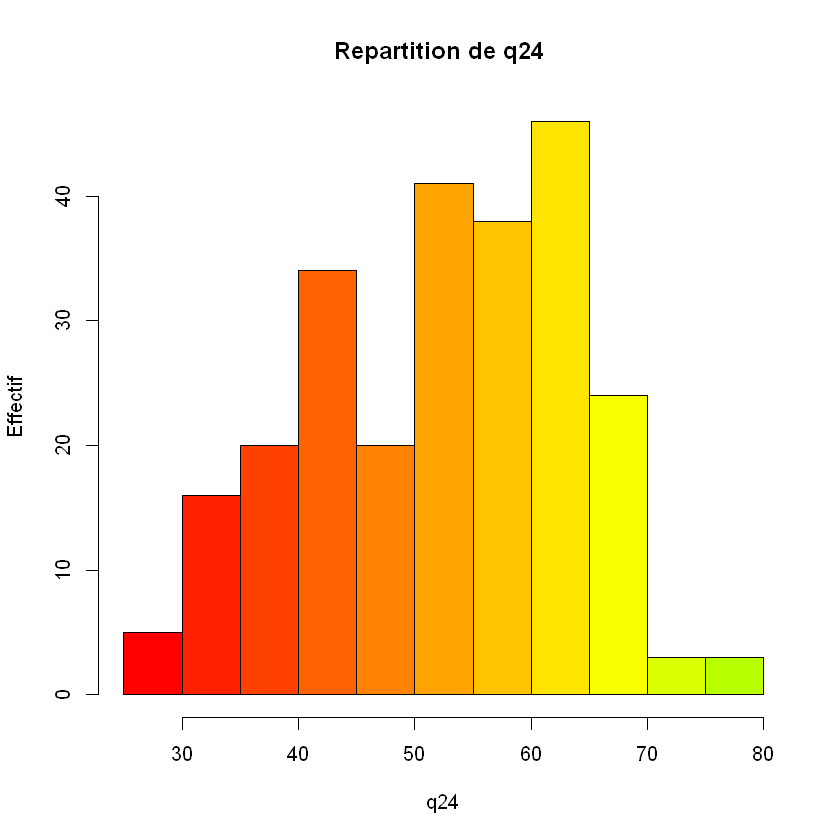

[1] "--------------------------------------------------------------------------------------------------------------"


$moyenne
[1] 53.252

$mediane
[1] 55

$mode
[1] 45

$Ecart_type
[1] 11.12635

$variance
[1] 123.7957

$etendue
[1] 26 80

$quantiles
25% 50% 75% 
 45  55  62

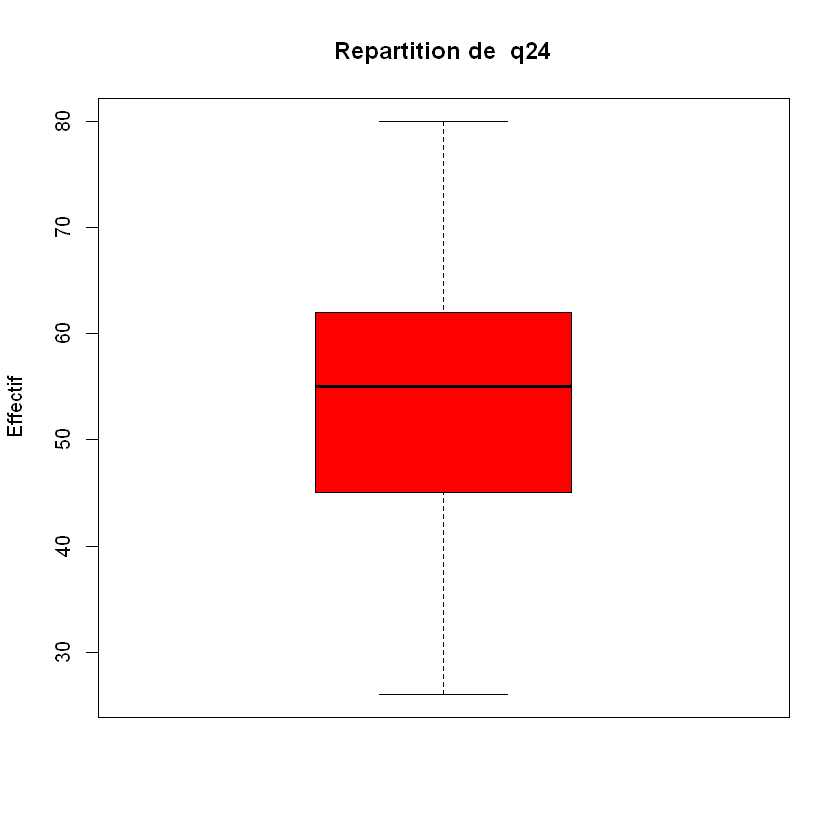

In [48]:
univarie("q24",tableau=TRUE,histogramme=TRUE,boite_moustache=TRUE)  # q24 == age

In [49]:
# Le tableau des frequences (si demande)
tableau_effectifs # les intervalles sont du type [a,b]

intervalle,Freq
<fct>,<int>
"[26,43]",55
"(43,51.6]",45
"(51.6,58]",57
"(58,63]",47
"(63,80]",46


In [50]:
#-------------------------------------------------------------- Teste pour les variables qualitatives

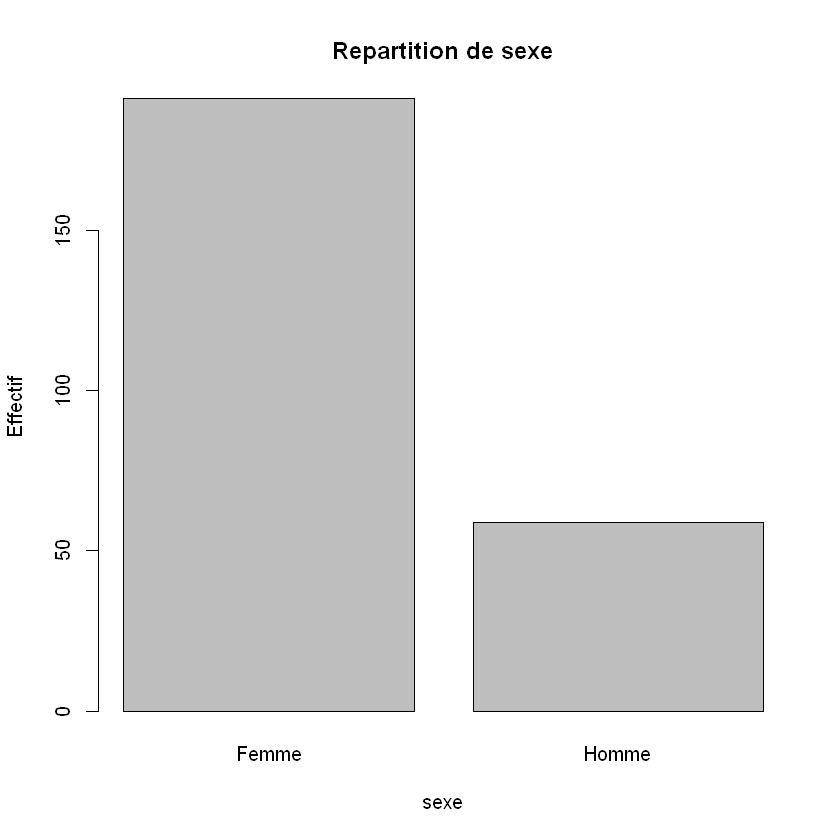

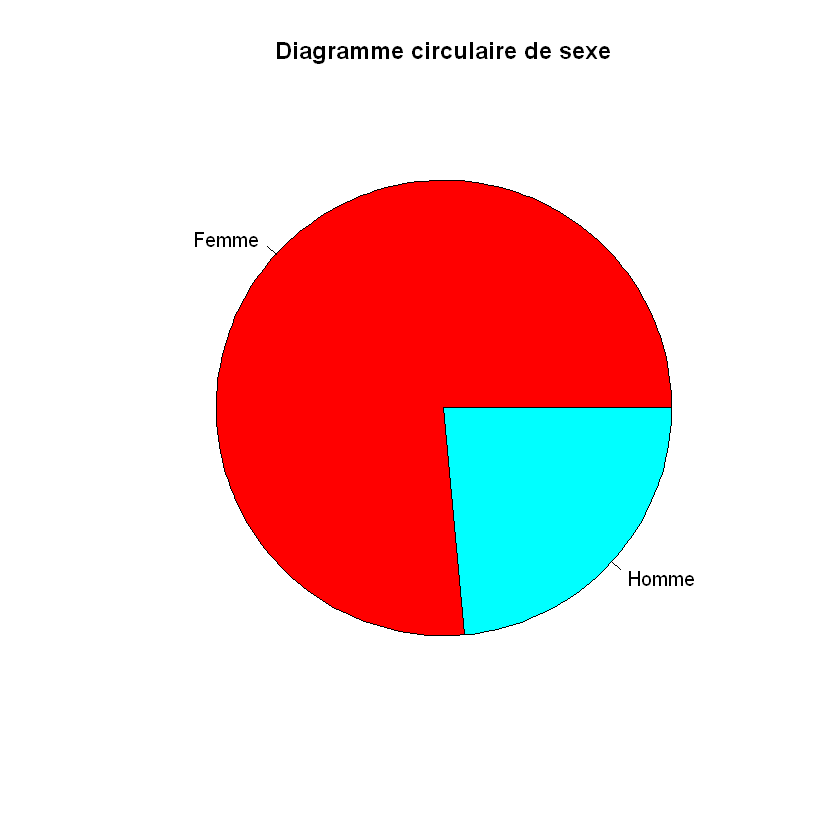

In [51]:

univarie("sexe",tableau=TRUE,diagramme_circulaire=TRUE,diagramme_baton=TRUE) 

In [52]:
# Le tableau des frequences (si demande)
tableau_effectifs # les intervalles sont du type [a,b]

Categorie,Effectif,Pourcentage
<fct>,<int>,<dbl>
Femme,191,76.4
Homme,59,23.6


## statistique bivarie

In [53]:
#' Analyse bivariée entre deux variables dans un ensemble de données
#'
#' Cette fonction effectue une analyse bivariée entre deux variables dans un ensemble de données, y compris la création de visualisations et la réalisation de tests statistiques appropriés.
#'
#' @param var1 Le nom de la première variable à analyser.
#' @param var2 Le nom de la deuxième variable à analyser.
#' @param projet_ Le data frame contenant les données à analyser (par défaut, il est attendu que le data frame s'appelle "projet").
#' @param tableau_croise Indique si un tableau croisé des fréquences doit être généré pour les variables catégorielles (par défaut : TRUE).
#' @param teste_khi2 Indique si le test du khi2 doit être réalisé pour les variables catégorielles (par défaut : FALSE).
#' @param nuage_point Indique si un nuage de points doit être tracé pour les variables numériques (par défaut : FALSE).
#' @param regression_lineaire Indique si une régression linéaire doit être effectuée pour les variables numériques (par défaut : FALSE).
#' @return Un data frame contenant les résultats des analyses bivariées, y compris les tableaux croisés des fréquences et les résultats des tests du khi2, le cas échéant.
#' @examples
#' # Analyse bivariée entre deux variables numériques
#' bivarie("age", "salaire", projet = my_data_frame, nuage_point = TRUE, regression_lineaire = TRUE)
#'
#' # Analyse bivariée entre deux variables catégorielles
#' bivarie("genre", "education", projet = my_data_frame, tableau_croise = TRUE, teste_khi2 = TRUE)
#'
#' @export
bivarie <- function(var1, var2, projet_ = projet,
                   tableau_croise=TRUE,
                   teste_khi2=FALSE,
                   nuage_point=FALSE,
                   regression_lineaire=FALSE) {
bivarie <- function(var1, var2, projet_ = projet,
                   tableau_croise=TRUE,
                   teste_khi2=FALSE,
                   nuage_point=FALSE,
                   regression_lineaire=FALSE) {
  
   # -----------------------------------------------------------------------------------------------------------------------
    # Correction des valeurs abherentes (source de probleme pour la construction de graphiques (intervalles,...),etc)
    if (is.numeric(projet_[[var1]])) {
        # Remplacer les valeurs extrêmes par la médiane
        q1 <- quantile(projet_[[var1]], 0.25, na.rm = TRUE)
        q3 <- quantile(projet_[[var1]], 0.75, na.rm = TRUE)
        iqr <- q3 - q1
        lower_bound <- q1 - 1.5 * iqr
        upper_bound <- q3 + 1.5 * iqr
        non_aberrant_values <- projet_[[var1]]
        non_aberrant_values[non_aberrant_values < lower_bound | non_aberrant_values > upper_bound] <- median(projet_[[var1]], na.rm = TRUE)
        projet_[[var1]]<- non_aberrant_values 
    }
     if (is.numeric(projet_[[var2]])) {
        # Remplacer les valeurs extrêmes par la médiane
        q1 <- quantile(projet_[[var2]], 0.25, na.rm = TRUE)
        q3 <- quantile(projet_[[var2]], 0.75, na.rm = TRUE)
        iqr <- q3 - q1
        lower_bound <- q1 - 1.5 * iqr
        upper_bound <- q3 + 1.5 * iqr
        non_aberrant_values <- projet_[[var2]]
        non_aberrant_values[non_aberrant_values < lower_bound | non_aberrant_values > upper_bound] <- median(projet_[[var2]], na.rm = TRUE)
        projet_[[var2]]<- non_aberrant_values 
    }
    
        #  --- pour les variables categorielle il faut faire une etude cas par cas et utilisant le type factor

    
    
    # ----------------------------------------------------------------------------------------------
    resultats <- list()
      # Vérification de l'existence des variables dans le data.frame
    if (!(var1 %in% names(projet_)) || !(var2 %in% names(projet_))) {
        stop("Une ou plusieurs variables spécifiées n'existent pas dans le data.frame.")
    }
  # Vérification du type des variables
  if (is.numeric(projet_[[var1]]) && is.numeric(projet_[[var2]])) {
    # Les deux variables sont numériques
    
    if (nuage_point) {
      # Nuage de points
      plot(projet_[[var1]], projet_[[var2]], 
           main = paste("Nuage de points entre", var1, "et", var2), 
           xlab = var1, ylab = var2)
    }
    
    if (regression_lineaire) {
      # Régression linéaire
      lm_model <- lm(projet_[[var2]] ~ projet_[[var1]], data = projet_)
      summary(lm_model)
    }
    
  } else if (!is.numeric(projet_[[var1]]) && !is.numeric(projet_[[var2]])) {
    # Les deux variables sont catégorielles
    
    if (tableau_croise) {
      # Tableau croisé
      contingency_table <- table(projet_[[var1]], projet_[[var2]])
      resultats$tableau_croise <- contingency_table
    }
    
    if (teste_khi2) {
      # Test du khi2
      chi2_test <- chisq.test(contingency_table)
      resultats$teste_khi2 <- chi2_test
    }
    
  } else {
    # Les variables sont de types différents (une numérique et une catégorielle)
    stop("Les types des variables spécifiées sont différents. Veuillez fournir deux variables du même type.")
  }
  
  resultats<<- as.data.frame(resultats)
}

ERROR: Error in parse(text = x, srcfile = src): <text>:106:0: fin d'entrée inattendue
104:   resultats<<- as.data.frame(resultats)
105: }
    ^


In [ ]:
bivarie("sexe","region",nuage_point=TRUE)

In [ ]:
resultats

In [ ]:
bivarie("q24","q26",nuage_point=TRUE)

In [ ]:
resultats

In [ ]:
# Tous fonctionne bien passons a l'analyse

### Analyse par filiere

In [ ]:
# on doit convertir filiere_1 en str (definition de bivarie()oblige)
projet$filiere_1 <- as.character(projet$filiere_1)

bivarie("filiere_1","region",nuage_point=TRUE) #pas de nuage de point comme on pouvais s'y attendre

In [ ]:
resultats

In [ ]:
# on remarque que la region de ziguinchor et saint-louis sont les champions pour la filiere arachide

In [ ]:
# regardons la variable today

univarie("today",tableau=TRUE,diagramme_circulaire=TRUE,diagramme_baton=TRUE) 

In [ ]:
# la pluspart des donne dates de 2021

In [ ]:
# on doit convertir q25 en str (definition de bivarie()oblige)
projet$q25 <- as.character(projet$q25)
bivarie("filiere_1","q25",nuage_point=TRUE)#La population n'est pas representative donc pas de teste du khi-2

In [ ]:
resultats

In [ ]:
# Dans la filiere arachide ,plus le niveau d'instruction augmente moins on trouve d'effectif

In [ ]:
# regardons la filiere mangue

In [ ]:
bivarie("filiere_2","q24a_3",nuage_point=TRUE) #q24== age